In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print("Customers Dataset Overview:")
print(customers.info())
print(customers.head())

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset Overview:")
print(products.info())
print(products.head())


Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset Overview:")
print(transactions.info())
print(transactions.head())


Transactions Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070

Exploratory Data Analysis

In [6]:
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

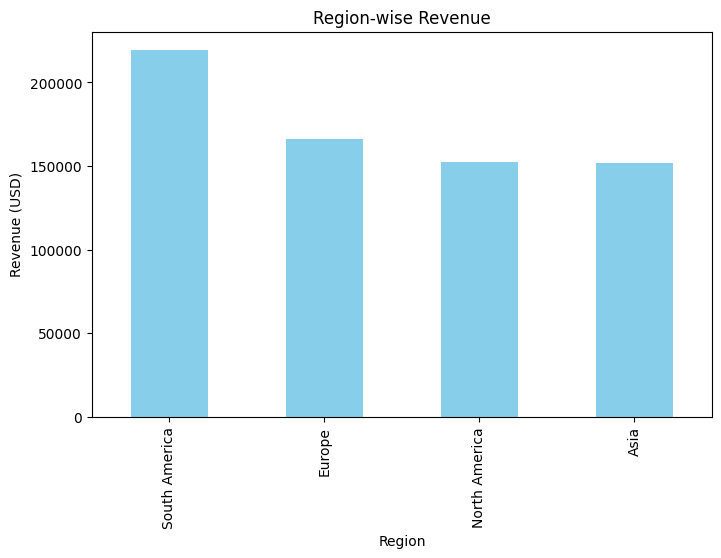

In [7]:
# 1. Region-wise revenue analysis
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Region-wise Revenue')
plt.ylabel('Revenue (USD)')
plt.show()

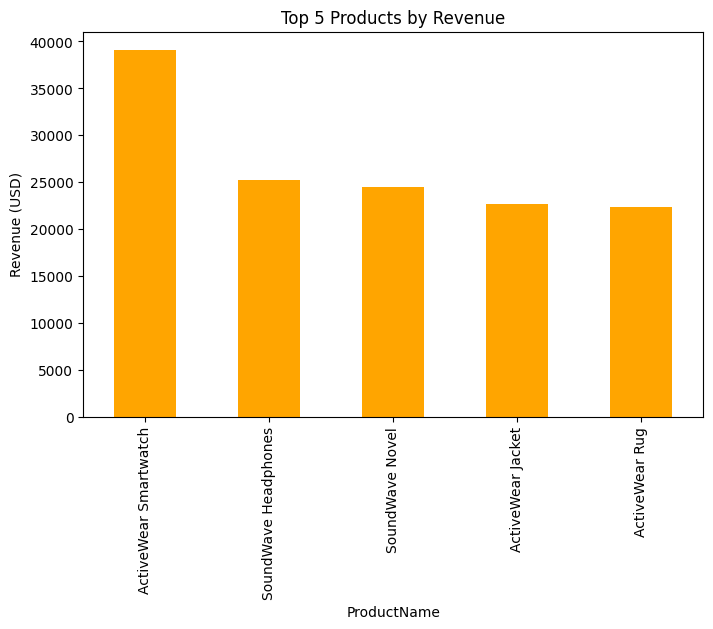

In [8]:
# 2. Top 5 products by revenue
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Top 5 Products by Revenue')
plt.ylabel('Revenue (USD)')
plt.show()


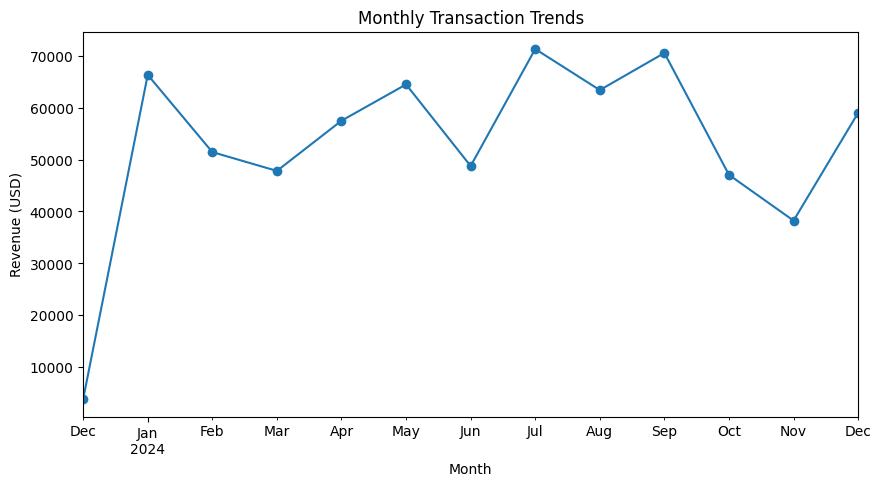

In [9]:
# 3. Monthly transaction trends
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_trend = data.groupby('Month')['TotalValue'].sum()
monthly_trend.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Transaction Trends')
plt.ylabel('Revenue (USD)')
plt.show()

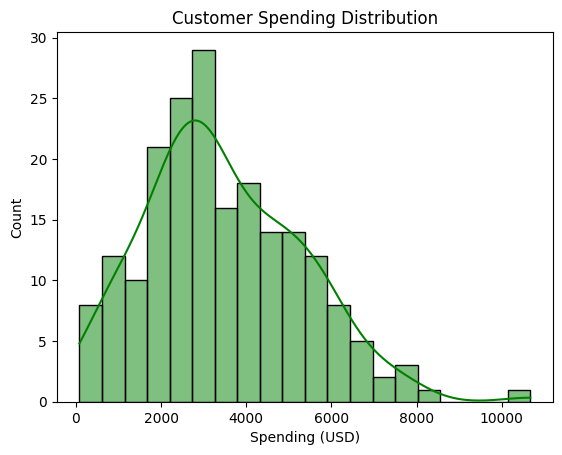

In [10]:
# 4. Customer segmentation by spending
customer_spending = data.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(customer_spending, bins=20, kde=True, color='green')
plt.title('Customer Spending Distribution')
plt.xlabel('Spending (USD)')
plt.show()

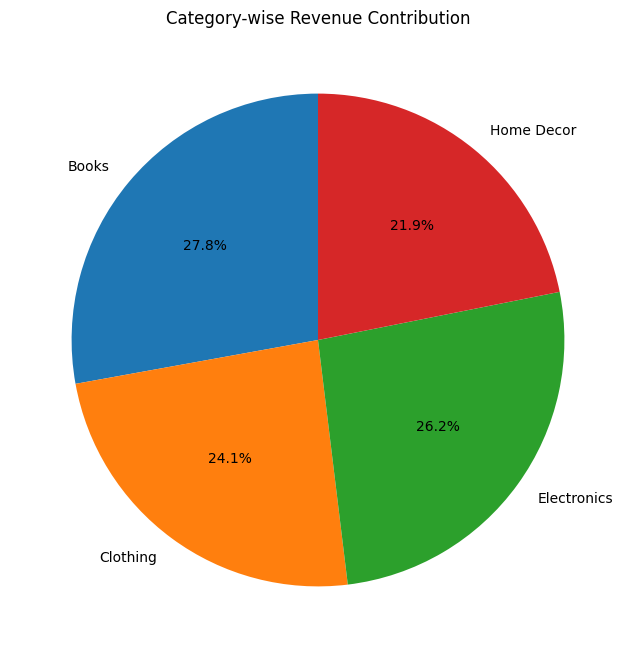

In [11]:
# 5. Category-wise revenue contribution
category_revenue = data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Category-wise Revenue Contribution')
plt.ylabel('')
plt.show()


In [12]:
# Save processed dataset for further tasks
data.to_csv("Processed_Data.csv", index=False)